# Importing necessary libraries

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dataset reading

In [ ]:
file_path = "/content/drive/MyDrive/DATASET(CRIME PREDICTION )/2023-11-avon-and-somerset-street.csv"

In [ ]:
# Reading the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the DataFrame to understand its structure
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2023-11,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,NaN,2023-11,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511744,51.414939,On or near Orchard Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
2,NaN,2023-11,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
3,NaN,2023-11,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509173,51.419104,On or near Durley Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
4,697da21d5afd84a1ca13db44498cdcf18b03dbbc94c2aa...,2023-11,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,NaN


In [ ]:
num_rows, num_cols = data.shape

print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Number of Rows: 14037
Number of Columns: 12


### Pie chart before data cleaning

In [ ]:
# Pie chart for distribution of crime types before preprocessing
crime_counts = data['Crime type'].value_counts()
fig = px.pie(names=crime_counts.index, values=crime_counts.values, title='Distribution of Crime Types')
fig.show()

### Pairplot

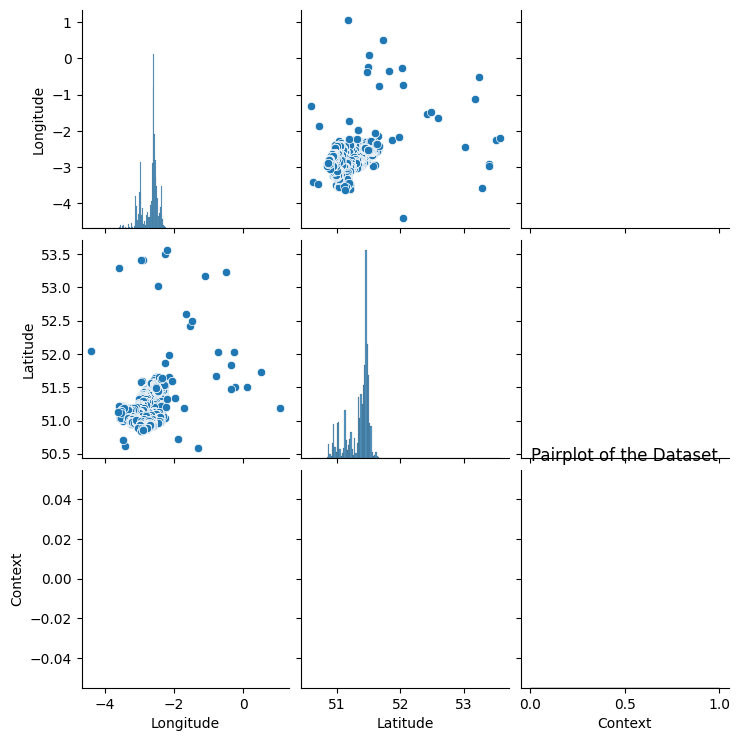

In [ ]:
sns.pairplot(data)
plt.title('Pairplot of the Dataset')
plt.show()

### Histogram

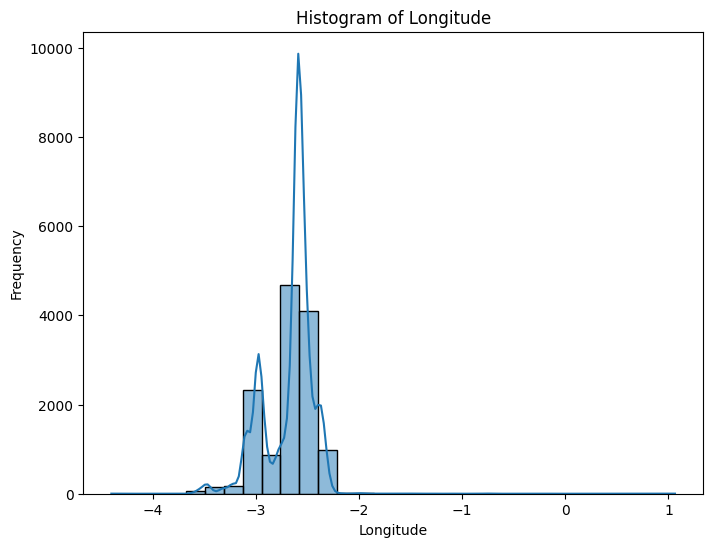

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Longitude'], bins=30, kde=True)
plt.title('Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

### Bar plot

In [ ]:
# Get the top 10 most frequent crime types
top_10_crime_types = data['Crime type'].value_counts().head(10)

# Create DataFrame for top 10 crime types
top_10_data = pd.DataFrame({'Crime type': top_10_crime_types.index, 'Count': top_10_crime_types.values})

# Create interactive count plot using Plotly Express
fig = px.bar(top_10_data, x='Crime type', y='Count', title='Distribution of Top 10 Crime Types')
fig.show()

### Scatter plot of geographical distribution

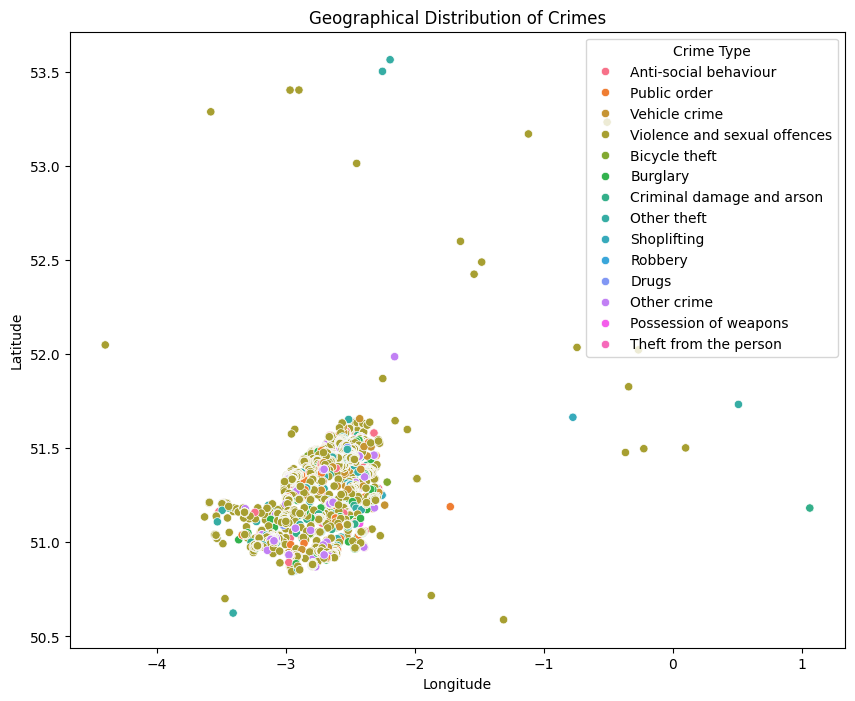

In [ ]:
# Visualize the geographical distribution of crimes
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Crime type', data=data)
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Crime Type')
plt.show()

### Top 5 most frequent crime types

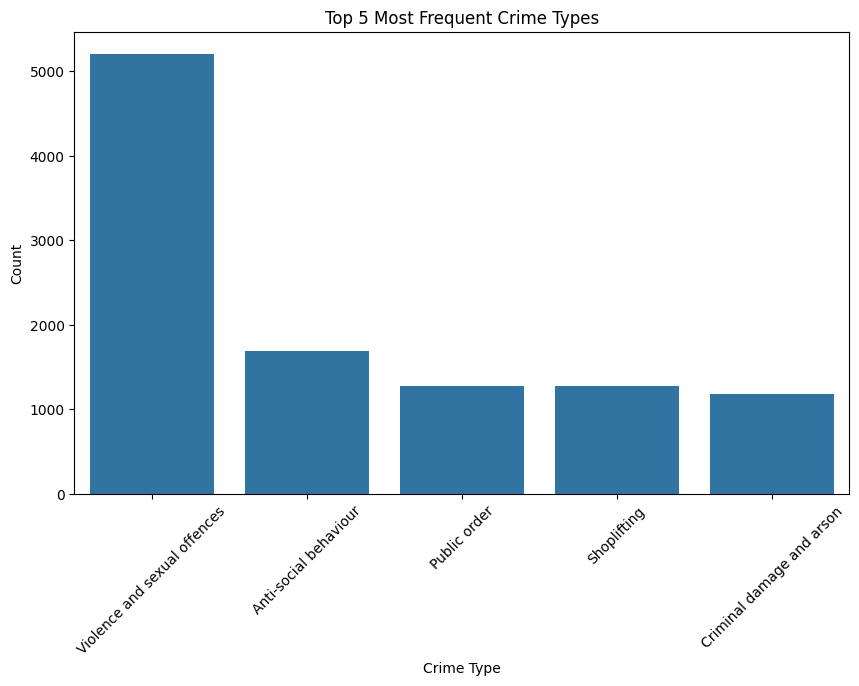

In [ ]:
# Get the top 5 most frequent crime types
top_5_crime_types = data['Crime type'].value_counts().head(5)

# Create bar plot for top 5 crime types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_crime_types.index, y=top_5_crime_types.values)
plt.title('Top 5 Most Frequent Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [ ]:
# Display the structure of the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14037 entries, 0 to 14036
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               12349 non-null  object 
 1   Month                  14037 non-null  object 
 2   Reported by            14037 non-null  object 
 3   Falls within           14037 non-null  object 
 4   Longitude              13383 non-null  float64
 5   Latitude               13383 non-null  float64
 6   Location               14037 non-null  object 
 7   LSOA code              13383 non-null  object 
 8   LSOA name              13383 non-null  object 
 9   Crime type             14037 non-null  object 
 10  Last outcome category  12349 non-null  object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 1.3+ MB
None


In [ ]:
# Drop unnecessary columns
data.drop(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Location', 'LSOA code', 'LSOA name', 'Context'], axis=1, inplace=True)

In [ ]:
data

,Longitude,Latitude,Crime type,Last outcome category
0,-2.509285,51.409716,Anti-social behaviour,NaN
1,-2.511744,51.414939,Anti-social behaviour,NaN
2,-2.492876,51.422716,Anti-social behaviour,NaN
3,-2.509173,51.419104,Anti-social behaviour,NaN
4,-2.492876,51.422716,Public order,Unable to prosecute suspect
...,...,...,...,...
14032,NaN,NaN,Other crime,Under investigation
14033,NaN,NaN,Other crime,Action to be taken by another organisation
14034,NaN,NaN,Other crime,Under investigation
14035,NaN,NaN,Other crime,Under investigation


## Checking and handling null values

In [ ]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:")
print(null_values)


Null values in each column:
Longitude                 654
Latitude                  654
Crime type                  0
Last outcome category    1688
dtype: int64


In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Convert categorical variables into numerical representations
data = pd.get_dummies(data, columns=['Crime type', 'Last outcome category'])

In [ ]:
data

,Longitude,Latitude,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,...,Last outcome category_Formal action is not in the public interest,Last outcome category_Further action is not in the public interest,Last outcome category_Further investigation is not in the public interest,Last outcome category_Investigation complete; no suspect identified,Last outcome category_Local resolution,Last outcome category_Offender given a caution,Last outcome category_Offender given a drugs possession warning,Last outcome category_Suspect charged as part of another case,Last outcome category_Unable to prosecute suspect,Last outcome category_Under investigation
4,-2.492876,51.422716,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
5,-2.515659,51.408897,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,-2.509173,51.419104,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,-2.510032,51.410936,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,-2.492876,51.422716,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13378,-1.983657,51.338116,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13379,-1.983657,51.338116,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13380,-2.214693,51.319892,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13381,-1.725188,51.189151,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


# Exploratory Data Analysis (EDA)

### Summary statistics

In [ ]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
          Longitude      Latitude
count  11695.000000  11695.000000
mean      -2.672277     51.345361
std        0.245486      0.189191
min       -4.401109     50.588762
25%       -2.797058     51.231315
50%       -2.595541     51.418334
75%       -2.543963     51.466658
max        1.063078     53.563816


# Data Visualization

### Count plot

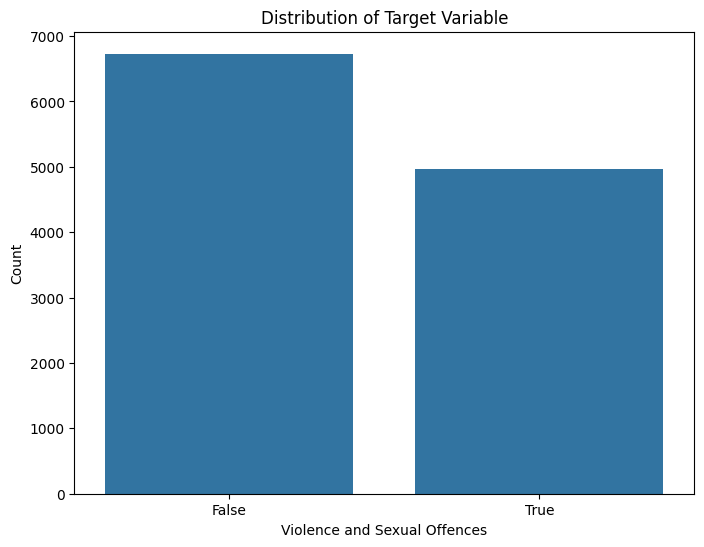

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Crime type_Violence and sexual offences', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Violence and Sexual Offences')
plt.ylabel('Count')
plt.show()

### Correlation heatmap

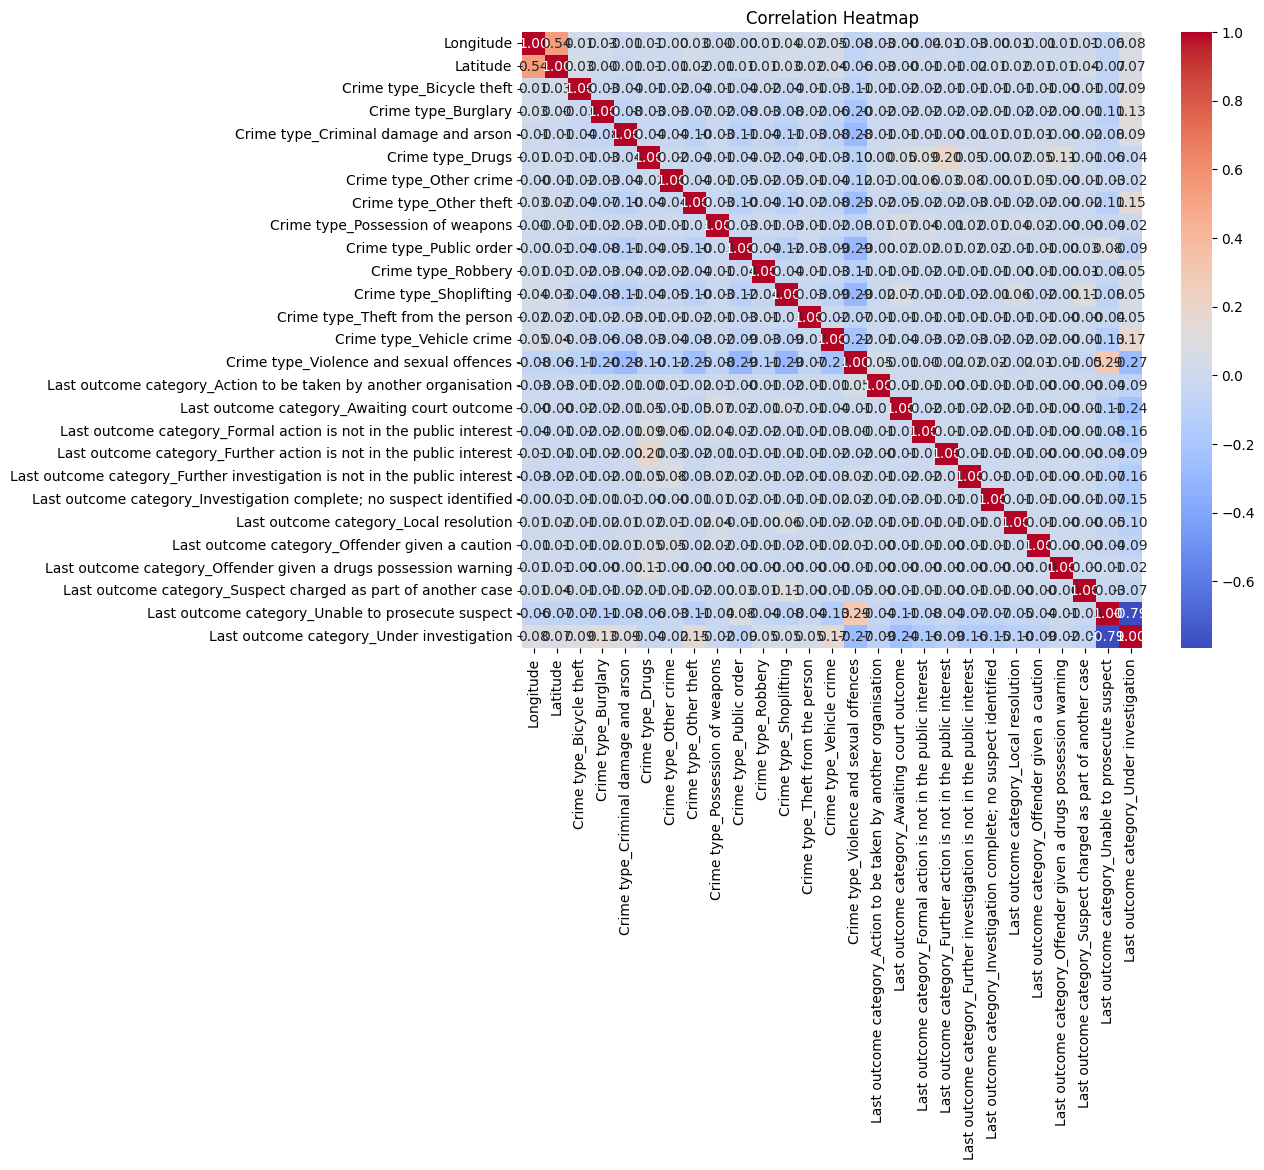

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Interactive Correlation heatmap of crime type with geographic condition

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Correlation heatmap
correlation_matrix = data.corr()
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis'))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features'
)

fig.show()

# Geographical distribution of crimes
fig = px.scatter_geo(data, lat='Latitude', lon='Longitude', hover_name='Crime type_Violence and sexual offences',
                     title='Geographical Distribution of Crimes',
                     projection='natural earth')
fig.show()


### Interactive Pie chart

In [ ]:
import plotly.express as px

# Pie chart for distribution of crime types
fig = px.pie(data, names=crime_counts.index, values=crime_counts.values, title='Distribution of Crime Types')
fig.show()

### Interactive count plot

In [ ]:
# Calculate the count of each crime type
crime_counts = data.iloc[:, 5:].sum()

# Create an interactive bar chart for count of each crime type
fig = px.bar(x=crime_counts.index, y=crime_counts.values,
             title='Count of Each Crime Type After Preprocessing',
             labels={'x': 'Crime Type', 'y': 'Count'})

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

# Model Training

In [ ]:
# Define features (X) and target variable (y)
X = data.drop('Crime type_Violence and sexual offences', axis=1)
y = data['Crime type_Violence and sexual offences']

### Splitting the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Classification Algorithms

### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjusting max_depth
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Decision Tree Classifier
dt_pred = dt_classifier.predict(X_test)
dt_classification_report = classification_report(y_test, dt_pred)
print("Decision Tree Classifier Report:")
print(dt_classification_report)



Decision Tree Classifier Report:
              precision    recall  f1-score   support

       False       1.00      0.67      0.80      1335
        True       0.70      1.00      0.82      1004

    accuracy                           0.81      2339
   macro avg       0.85      0.84      0.81      2339
weighted avg       0.87      0.81      0.81      2339



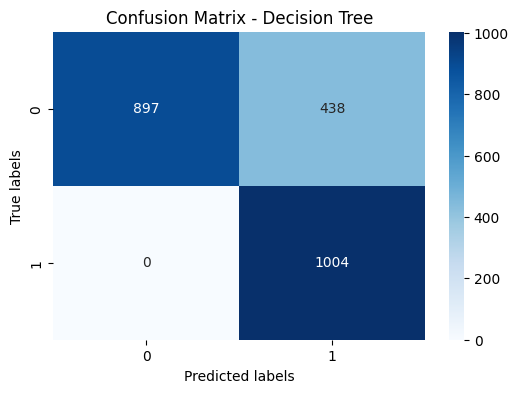

In [ ]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Decision Tree Classifier
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(dt_conf_matrix, 'Decision Tree')

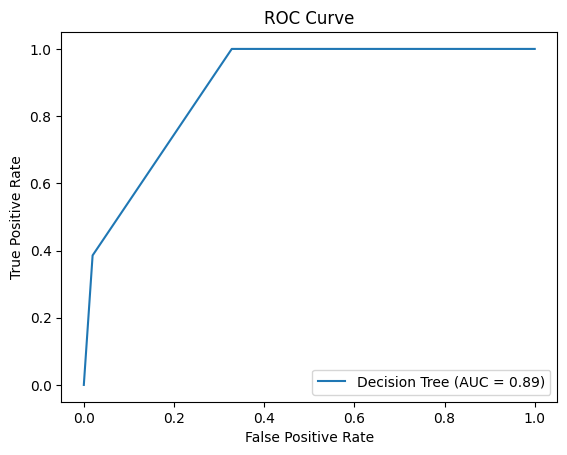

In [ ]:
# Define a function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

# Decision Tree Classifier
dt_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_proba)
auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, auc_dt, 'Decision Tree')

### Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)  # Using 'rbf' kernel and C=1.0
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Support Vector Machine (SVM)
svm_pred = svm_classifier.predict(X_test)
svm_classification_report = classification_report(y_test, svm_pred)
print("\nSupport Vector Machine Report:")
print(svm_classification_report)


Support Vector Machine Report:
              precision    recall  f1-score   support

       False       0.65      0.84      0.73      1335
        True       0.66      0.40      0.50      1004

    accuracy                           0.65      2339
   macro avg       0.65      0.62      0.62      2339
weighted avg       0.65      0.65      0.63      2339



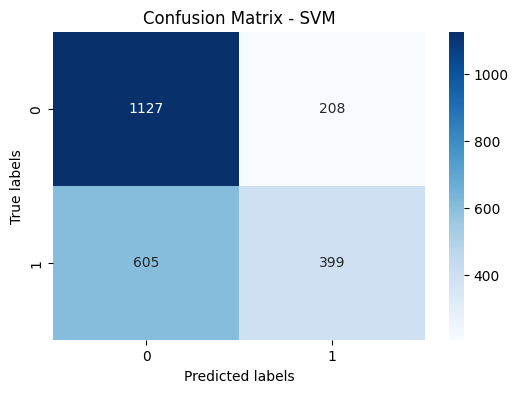

In [ ]:
# Support Vector Machine (SVM)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(svm_conf_matrix, 'SVM')

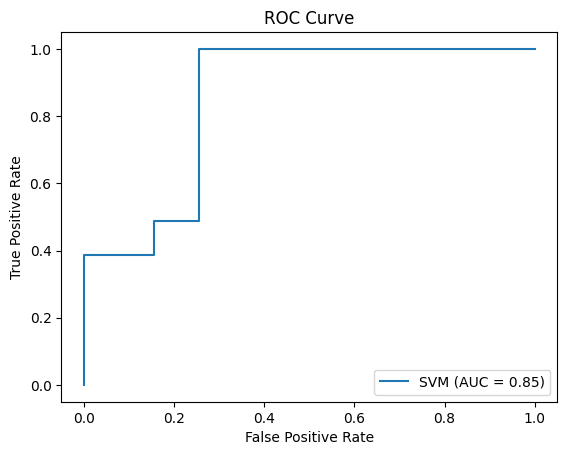

In [ ]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)  # Enabling probability estimates
svm_classifier.fit(X_train, y_train)
svm_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred_proba)
auc_svm = auc(fpr_svm, tpr_svm)
plot_roc_curve(fpr_svm, tpr_svm, auc_svm, 'SVM')

### Artificial Neural Network (ANN)

In [ ]:
# Artificial Neural Network (ANN)
ann_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)  # Adjusting hidden_layer_sizes and max_iter
ann_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

In [ ]:

# Artificial Neural Network (ANN)
ann_pred = ann_classifier.predict(X_test)
ann_classification_report = classification_report(y_test, ann_pred)
print("\nArtificial Neural Network Report:")
print(ann_classification_report)


Artificial Neural Network Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1335
        True       1.00      1.00      1.00      1004

    accuracy                           1.00      2339
   macro avg       1.00      1.00      1.00      2339
weighted avg       1.00      1.00      1.00      2339



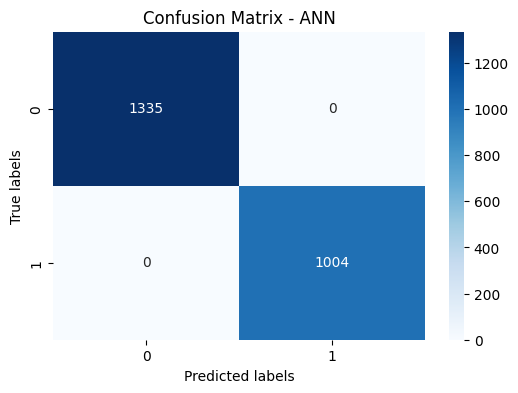

In [ ]:
# Artificial Neural Network (ANN)
ann_conf_matrix = confusion_matrix(y_test, ann_pred)
plot_confusion_matrix(ann_conf_matrix, 'ANN')

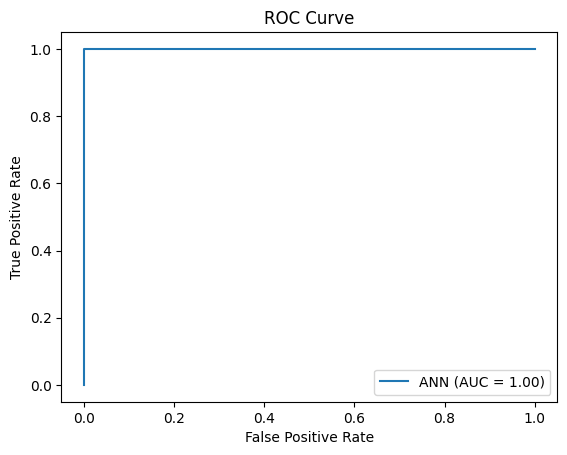

In [ ]:
# Artificial Neural Network (ANN)
ann_pred_proba = ann_classifier.predict_proba(X_test)[:, 1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_pred_proba)
auc_ann = auc(fpr_ann, tpr_ann)
plot_roc_curve(fpr_ann, tpr_ann, auc_ann, 'ANN')

## Model Evaluation

In [ ]:
# Making predictions
dt_pred = dt_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
ann_pred = ann_classifier.predict(X_test)

In [ ]:
# Evaluating Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

Decision Tree Classifier Accuracy: 0.8127404873877726


In [ ]:
# Evaluating Support Vector Machine (SVM)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Accuracy:", svm_accuracy)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

Support Vector Machine Accuracy: 0.652415562206071


In [ ]:
# Evaluating Artificial Neural Network (ANN)
ann_accuracy = accuracy_score(y_test, ann_pred)
print("Artificial Neural Network Accuracy:", ann_accuracy)
ann_conf_matrix = confusion_matrix(y_test, ann_pred)

Artificial Neural Network Accuracy: 1.0


### Confusion matrix

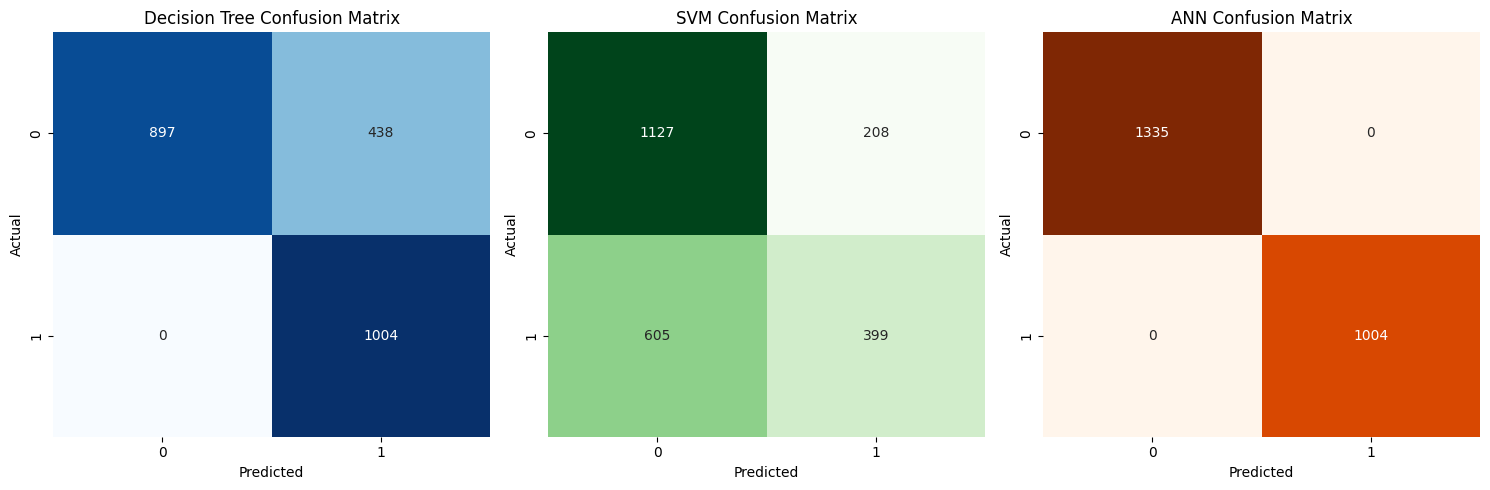

In [ ]:
# Plotting confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(dt_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(svm_conf_matrix, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(ann_conf_matrix, annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# 2. Regression Algorithms

Mean Squared Error (MSE): 4.609768901314212e-31
Mean Absolute Error (MAE): 5.133891506774559e-16
R^2 Score: 1.0


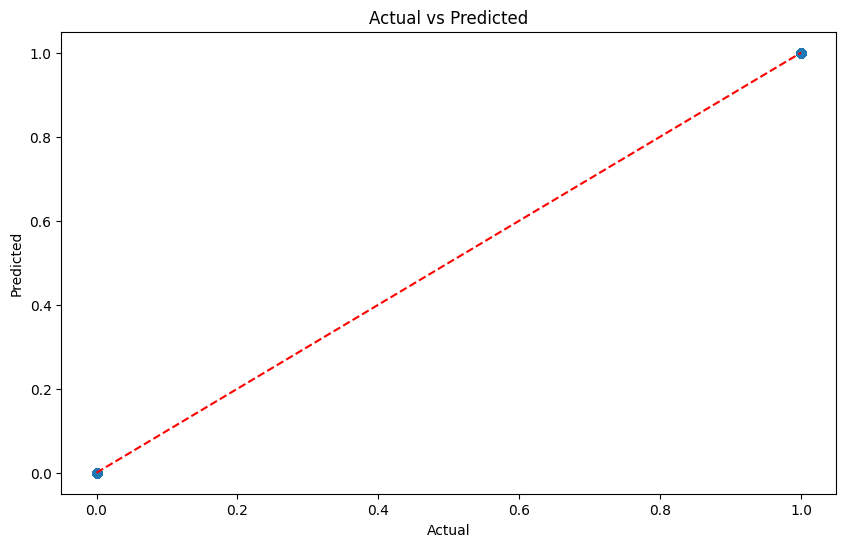

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Making predictions
y_pred = linear_reg_model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# 3. Clustering Algorithms

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



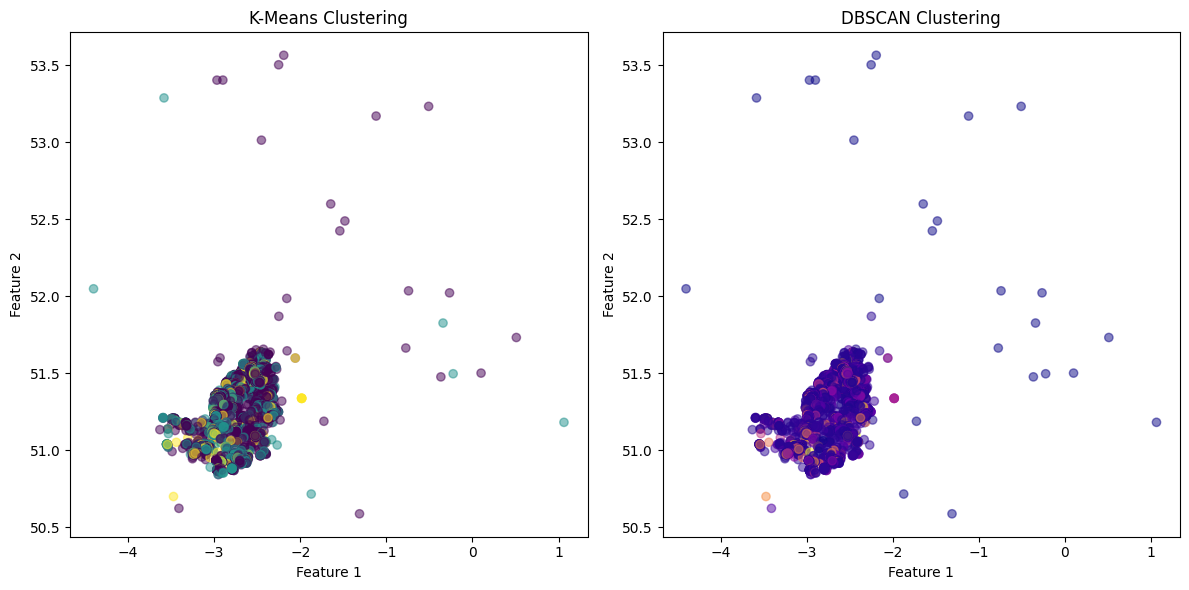

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Training K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Training DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Visualizing K-Means clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualizing DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan.labels_, cmap='plasma', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()